# Linear Regression - Experiment

This notebook will focus on understanding the mechanics of developing a linear regression.

_The data used is a generic data developed in Excel which may or mot not have any significant meaning._

In [1]:
# magic command to display plots using matplotlib
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import csv
import time
import math
import sklearn

In [ ]:
from importlib import reload

In [3]:
# Registering custom modules

module_path = os.path.join(os.path.pardir,"src","models")

if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
import linear_regression_model
from linear_regression_model import *

In [ ]:
# if necessary
reload(linear_regression_model)

In [3]:
rawDataPath = os.path.join(os.path.pardir,"data\\raw\\data.xlsx")
interimDataPath = os.path.join(os.path.pardir,"data\\interim\\")

In [4]:
# importing excel file for overall use

xl = pd.ExcelFile(rawDataPath)

In [5]:
# parsing the data into a dataframe

df = xl.parse("Raw")

In [6]:
df["x0"] = 1

## Linear Regression - Single Variable

_** this section will focus only when there is one variable_

Linear regression attempts to draw a single linear line that cuts across the data while minimizing the difference of each hypothethical output $h(\theta)$ to the actual $y$. This follows the natural equation for a linear line with a single variable, $y = mx + c $, then remasked as : 

$$h(\theta) = \theta_0 + \theta_1x_1$$

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x=df["X"],y=df["Y"])
plt.plot(df["X"],1.0559*df["X"]-0.35,c="r")
plt.show()

Since real world data is not going to be perfect (ie. the data usually does not line up on an exact straight line), the drawn line in attempt to emulate the real world data will have differences, hence the name hypothetical is used. 

The objective of the application is to develop a model that simulates as little difference to the real world values based on each point given.

In order to do that, we will have to calculate the _average_ difference of each hypothetical output against the actual y output. This can be done using a __cost function__ as following :

$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(h(\theta) - y^{(i)})^2$$

By replacing $h(\theta)$ with its full equation as given above, we get :

$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1x_1^{(i)} - y^{(i)})^2$$

The one item to note is that the above has two variables that needs to be optimized, ie. $\theta_0$ and $\theta_1$. However, to optimize, we will focus on one variable at a time to which we can conclude that the cost function is a quadratic function that looks as following :

In [ ]:
x = np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5])
plt.plot(x,0.5*(x**2))
plt.axvline(x=0,color="k")
plt.axhline(y=0,color="k")
plt.ylabel(r"$J(\theta_0,\theta_1)$")
plt.xlabel(r"$\theta_0$")
plt.show()

Understanding that the __cost function__ is a mean or average of difference between the hypothetical output against the actual y values, our aim is to identify when the variable $\theta_0$ or $\theta_1$ is at will result in a minimum. In the above illustration, the minimum would be when $\theta_0 = 0$ and $\theta_1 = 0$, producing $J(\theta_0,\theta_1) = 0)$

_** note that whenever $J(\theta_0,\theta_1) = 0$, it means that the average difference is 0 which means the models fit the real world data exactly._

Hence, our objective now is to find a function to identify when the cost function is as its minimum. Applying calculus, we could do so by identifying the gradient (tangent) to the function (line) to which when the gradient is 0, it will be at its lowest.

_** note that a quadratic function will only have on minimum. This may not be the case if we are using more complicated equations such as polynomial equations etc._

In this scenario, since our equations have two variables, we will need to apply partial derivative in respect to the variables.

$$
\begin{align}
\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{2m}\frac{\partial}{\partial \theta_0}\sum_{i=1}^{m}(\theta_0 + \theta_1x_1^{(i)} - y^{(i)})^2
\end{align} 
$$




$$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{2m}\frac{\partial}{\partial \theta_1}\sum_{i=1}^{m}(\theta_0 + \theta_1x_1^{(i)} - y^{(i)})^2$$

The above partial derivatives will result in the following equation

$$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1)  = \frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x_1^{(i)} - y^{(i)})$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x_1^{(i)} - y^{(i)})(x_1^{(i)})$$

Hence, our objective will be to achieve :

$$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) \approx 0$$

$$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) \approx 0$$

In order to achieve the above, each found gradient $\frac{\partial}{\partial \theta_j} J(\theta_j,\theta_j)$ must be moved a certain "distance" to achieve approximately zero. Hence , if the gradient is positive, it will need to move backwards to 0 and vice versa.

This "distance" is also known as the learning rate, $\alpha$ with the equation as following :

$$\theta_j = \theta_j - \alpha\frac{\partial}{\partial \theta_j} J(\theta_j,\theta_j)$$

Once the "distance" is approximately 0, we can consider that we have reached an optimal value. This is what we call : __convergence__


In [7]:
# parameters for the linear regression model

alpha_0= 0.02
alpha_1 = 0.02

theta_0 = 0
theta_1 = 0

threshold = 0.01

### Non Matrix Method

In this section, we'll explore through using the equations above to resolve the loaded dataframe, df above.

In [ ]:
# defining the function to optimize single variable linear regression variables

def optimizesvlrvariables(df,theta_0=0,theta_1=0,alpha_0 = 0.01,alpha_1 = 0.01,threshold=0.001,writecalculationtofile=True):
    interimDataPath = os.path.join(os.path.pardir,"data\\interim")
    
    counter = 0

    source_rows = len(df.index)

    list_output = list()
    
    gradient = 10 # initializing to a value that's larger than the while condition
    
    start_time = time.time()
    while abs(gradient) > threshold:

        sumHypError0 = 0
        sumHypError1 = 0

        for row in df.itertuples():
            hyp0 = theta_0 + theta_1 * row.X
            sumHypError0+= hyp0 - row.Y
            sumHypError1+= (hyp0-row.Y) * row.X
        
        J = (sumHypError0 ** 2) * 0.5 / source_rows

        list_output.append((counter,theta_0,theta_1,J,sumHypError0,sumHypError1))

        gradient_0 = sumHypError0 / source_rows
        gradient_1 = sumHypError1 / source_rows

        theta_0 = theta_0 - alpha_0 * gradient_0
        theta_1 = theta_1 - alpha_1 * gradient_1

        if(gradient_1>gradient_0):
            gradient = gradient_1
        else:
            gradient = gradient_0

        if counter == 5000 :#iteration limit
            print("Convergence may not be achieved as it has reached an iteration limit of {}".format(counter))
            break

        counter +=1

    if writecalculationtofile:
        with open(os.path.join(interimDataPath,"trained_values.csv"),"w") as out:
            csv_out = csv.writer(out)
            csv_out.writerow(["iteration","theta0","theta1","J","HypError0","HypError1"])
            csv_out.writerows(row for row in list_output)

    end_time = time.time()
    return ((theta_0,theta_1),{"theta_0": theta_0,"theta_1":theta_1,"J":J,"diff_0":gradient_0,"diff_1":gradient_1,"iterations":counter,"time_taken":end_time-start_time})



In [ ]:
#df refers to the previous imported data frame file

variables1 = optimizesvlrvariables(df,threshold=0.001,alpha_0=0.001,alpha_1=0.001,writecalculationtofile=False)    
variables1

In [ ]:
# using the parameters set above


variables2 = optimizesvlrvariables(df,threshold=threshold,alpha_0=alpha_0,alpha_1=alpha_1,writecalculationtofile=False)    
variables2

### Matrix Method

In this section, we will aplpy the gradient descent but using a matrix to calculate the sum of errors. Our objective is to compare the time taken in both cases.

Hypothesis function : $h_\theta(x) = \theta^T x$

Cost function : $J(\theta) = \frac{1}{2m}(\theta^TX - y)^T(\theta^TX - y)$

In [10]:
def producethetamatrix(theta_0,theta_1):
    return np.matrix([theta_0,theta_1])

In [10]:
listofJ = list()

In [11]:
X = np.matrix(df[["x0","X"]])
Y = np.matrix(df[["Y"]])
x = np.matrix(df["X"])

O = np.matrix([1 for row in range(len(df))])

theta = producethetamatrix(theta_0,theta_1)

In [13]:
theta = np.matrix([theta_0,theta_1])

counter = 0
gradient = 10

start_time = time.time()

theta_iteration = [np.array((0,0))]
J_iteration = [0]

while abs(gradient) > threshold:
    
    gradient_0 = O * (X * theta.transpose() - Y) / len(X)
    gradient_1 = x * (X * theta.transpose() - Y) / len(X)
    
    theta_0 = theta_0 - alpha_0 * gradient_0.item(0)
    theta_1 = theta_1 - alpha_1 * gradient_1.item(0)
    
    J =  (X * theta.transpose()-Y).transpose() * (X * theta.transpose()-Y)/(2*len(X))
 
    theta = np.matrix([theta_0,theta_1])
    
    if(gradient_1>gradient_0):
        gradient = gradient_1
    else:
        gradient=gradient_0
    
    
    listofJ.append((theta_0,theta_1,J.item(0)))
    
    theta_iteration.append(np.array((theta_0,theta_1)))
    J_iteration.append(J.item(0))
    
    counter +=1
    
    if counter == 50000 :#iteration limit
        print("Convergence may not be achieved as it has reached an iteration limit of {}".format(counter))
        break

end_time = time.time()

In [14]:
dfiteration = pd.DataFrame(listofJ,columns=["theta_0","theta_1","J"])

In [15]:
{"theta_0": theta_0,"theta_1":theta_1,"J":J,"diff_0":gradient_0,"diff_1":gradient_1,"iterations":counter,"time_taken":end_time-start_time}

{'J': matrix([[4.47725117]]),
 'diff_0': matrix([[0.00999318]]),
 'diff_1': matrix([[-0.00100392]]),
 'iterations': 1184,
 'theta_0': -3.8405430050997587,
 'theta_1': 1.1874844006702543,
 'time_taken': 0.08153176307678223}

### Visualizing Gradient Descent

In this section, we are visualizing the movement of the theta (coefficients) of the gradient descent method (using the matrix method calculation)


A contour plot is used to identify the values of J theta with regards to theta0 and theta1 while the red pointers will display the movement of the theta.

In [14]:
min_theta_0 = int(min(dfiteration["theta_0"]))-5
max_theta_0 = math.ceil(max(dfiteration["theta_0"]))+5

min_theta_1 = int(min(dfiteration["theta_1"]))-5
max_theta_1 = math.ceil(max(dfiteration["theta_1"]))+5

In [ ]:
print(min_theta_0)
print(max_theta_0)

In [ ]:
print(min_theta_1)
print(max_theta_1)

In [15]:
m = 100
theta_0_range = np.linspace(min_theta_0,max_theta_0,m)
theta_1_range = np.linspace(min_theta_1,max_theta_1,m)

In [16]:
path = os.path.join(interimDataPath,"theta_0.csv")

with open(path,'w') as file:
    for theta in theta_0_range:
        file.write(str(theta))
        file.write(",")
        

In [17]:
path = os.path.join(interimDataPath,"theta_1.csv")

with open(path,'w') as file:
    for theta in theta_1_range:
        file.write(str(theta))
        file.write(",")

In [ ]:
x_vis

In [18]:
def cost_func(theta0, theta1,X,Y):
    J_arr = np.zeros(shape=(len(theta0),len(theta1)))
    
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    
    for theta0_index in range(0,len(theta0)):
        for theta1_index in range(0,len(theta1)):
            theta =  np.matrix([theta0[theta0_index],theta1[theta1_index]])
           
            sumsquarederror  = (X * theta.transpose()-Y).transpose() * (X * theta.transpose()-Y)
            J_arr[theta1_index,theta0_index] = sumsquarederror/(2*len(X))
     
    return J_arr

In [19]:
J_grid = cost_func(theta_0_range,
                   theta_1_range,
                  X,Y)

In [20]:
theta_0_mesh,theta_1_mesh = np.meshgrid(theta_0_range,theta_1_range)

In [ ]:
path = os.path.join(interimDataPath,"j_grid.csv")

with open(path,'w') as file:
    for row in J_grid:
        for col in row:
            file.write(str(col))
            file.write(",")
        file.write("\n")

In [ ]:
for j in range(1,len(J_iteration)):
    print (theta_iteration[j])

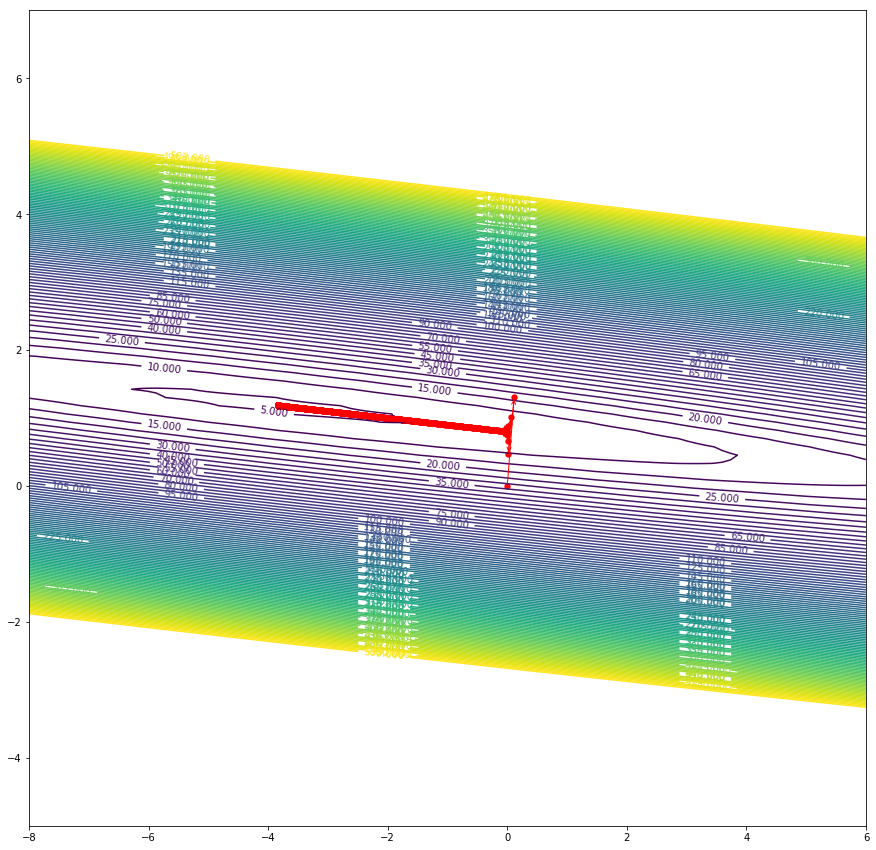

In [26]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

breaks = np.linspace(0,500,101)
cp = ax.contour(theta_0_mesh,theta_1_mesh,J_grid,breaks)
ax.clabel(cp, inline =True,fontsize =10)

for j in range(1,len(J_iteration)):
    ax.annotate('',xy=theta_iteration[j],xytext=theta_iteration[j-1],arrowprops={"arrowstyle":"->","color":"r","lw":1},va="center",ha="center")

ax.scatter(*zip(*theta_iteration),c=["red"],s=40,lw=0)


### Normal equation

In the cases above, gradient descent is used to find an optimum theta values. However, iteration one by one might take copmutational time. 

Hence, we can use a normal equation, in the form of matrices to obtain the optimum theta with the least cost function value.

The derivation of the formula below can be found here : https://ayearofai.com/rohan-3-deriving-the-normal-equation-using-matrix-calculus-1a1b16f65dda

$$\theta \equiv (X^TX)^{-1}X^Ty$$

In [12]:
theta = np.linalg.inv(X.transpose() * X) * X.transpose() * Y
theta

matrix([[-3.89578088],
        [ 1.19303364]])

### Scikit-Learn

In [13]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm.fit(df[["X"]],df.iloc[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# values obtained from the matrix method

theta_0, theta_1

(0, 0)

In [18]:
print(lm.intercept_)

-3.89578087831185


In [19]:
print(lm.coef_)

[1.19303364]


In [66]:
lm.predict(df[["X"]])

array([ 3.39377399,  2.6989512 ,  6.26719552,  4.45927234,  3.09515767,
        6.10530086,  5.02381586,  6.33818102,  3.84247394,  2.13452698,
        2.91727635, 13.00234766,  2.94507404,  6.13572322,  2.833764  ,
        2.52202431,  3.69835548,  2.22460102,  3.77494824,  4.53992141,
        3.48802365, 20.28701109,  2.65409313,  3.65146926,  2.74333205,
       18.70624151, 11.40845471,  9.17628876, 11.82363042, 22.59314512,
        2.37050903,  3.96559502,  7.13763287,  3.13333475,  5.90033768,
        5.56903223,  5.7629002 ,  2.79272364, 11.41799898,  3.68403908,
        2.55483273,  4.31527318, 10.07225703,  2.99243747,  5.43934948,
        4.56652606,  2.1531383 ,  3.02548451, 10.06271276,  2.71553436,
        5.09993141,  2.43648379,  4.96118159,  5.17497322,  3.65946258,
        3.69060076,  3.58955081,  2.83257096,  7.21160096,  7.38268198,
        6.63321825,  2.28329828, 21.49078204, 13.88996469, 18.72294398,
        4.71577457,  6.0005525 ,  8.3161115 ,  2.66518834, 20.37

In [69]:
gd_y = theta_0 + df["X"]*theta_1

In [68]:
gd_y

0    3.415105
1    2.723515
2    6.275162
3    4.475648
4    3.117878
Name: X, dtype: float64

In [70]:
plt.figure(figsize=(15,15))
plt.scatter(gd_y,lm.predict(df[["X"]]))
plt.xlabel("Manual Gradient Descent: $Y_i$")
plt.ylabel("Scikit Linear Regression prices: $\hat{Y}_i$")
plt.title("Manual Gradient Descent vs Scikit Linear Regression: $Y_i$ vs $\hat{Y}_i$")

Text(0.5,1,'Manual Gradient Descent vs Scikit Linear Regression: $Y_i$ vs $\\hat{Y}_i$')